# WAR-Predictor.ipynb
### **Scope:** Create a multiple linear regression model and random forest regression model to predict a pitcher's WAR based on other statistics.

In [55]:
#Package Imports
import pandas as pd 
import numpy as np
import rfpimp 
import sklearn.metrics as metrics
import os 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [56]:
#Load master dataset
df_pitching = pd.read_csv('pitching-masterdataset.csv')

print(df_pitching.describe())

            Season            W            L          ERA            G  \
count  3422.000000  3422.000000  3422.000000  3422.000000  3422.000000   
mean   2015.751023     6.230567     5.939801     3.900009    40.379018   
std       3.072060     4.267957     3.654775     1.172525    20.029921   
min    2011.000000     0.000000     0.000000     0.540000     8.000000   
25%    2013.000000     3.000000     3.000000     3.100000    25.000000   
50%    2016.000000     5.000000     5.000000     3.810000    33.000000   
75%    2018.000000     9.000000     8.000000     4.607500    61.000000   
max    2021.000000    24.000000    19.000000     9.580000    85.000000   

                GS           CG          ShO           SV          HLD  ...  \
count  3422.000000  3422.000000  3422.000000  3422.000000  3422.000000  ...   
mean     13.345120     0.274693     0.134424     3.141146     4.746055  ...   
std      12.577168     0.759965     0.443922     8.742923     7.737213  ...   
min       0.00000

In [70]:


#Split the master dataset into training set and testing set
#df_training, df_testing = train_test_split(df_pitching, test_size=0.25, random_state=42, shuffle=True)
df_training = df_pitching[df_pitching['Season']<=2019]
df_testing = df_pitching[df_pitching['Season']>=2020]

print("Number of records in training set: " + str(len(df_training)))
print("Number of records in testing set: " + str(len(df_testing)))
print("Total number of records in master dataset: " + str(len(df_pitching)))

Number of records in training set: 3003
Number of records in testing set: 419
Total number of records in master dataset: 3422


In [71]:
#Determine x and y variables. Let x represent the independent variables and y represent the dependent variable.
y_train = df_training['WAR']
X_train = df_training.drop(columns={'WAR', 'Season', 'Name', 'Team', 'playerid'})

y_test = df_testing['WAR']
X_test = df_testing.drop(columns={'WAR', 'Season', 'Name', 'Team', 'playerid'})

In [72]:
#Construct multiple regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#Apply multiple linear regression model prediction
y_pred_linear = regr.predict(X_test)

#R-squared results to determine the success of the multiple linear regression model
r2_linear = r2_score(y_test, y_pred_linear)
print("Multiple Linear Regression R-Squared Score: " + str(r2_linear))

Multiple Linear Regression R-Squared Score: 0.9831799381496875


In [104]:
#Construct random forest regression model
forest_regr = RandomForestRegressor(n_estimators=30, random_state=0)
forest_regr.fit(X_train, y_train)

#Apply random forest model prediction

y_pred_forest = forest_regr.predict(X_test)

In [101]:
mse = []
estimators = []
for x in range(1,151):
    forest_regr_test = RandomForestRegressor(n_estimators=x, random_state=0)
    forest_regr_test.fit(X_train, y_train)
    y_pred_forest_test = forest_regr_test.predict(X_test)
    mse.append(metrics.mean_squared_error(y_test, y_pred_forest_test))
    estimators.append(x)

[0.13279236276849643, 0.09632458233890215, 0.08070538318748344, 0.07053699284009547, 0.06445632458233891, 0.05832935560859188, 0.058656178461838196, 0.059973150357995234, 0.06115530805268275, 0.057288544152744626, 0.054807195408193454, 0.054637032617342894, 0.05556340116648544, 0.056212191320442265, 0.057236595067621326, 0.05837102849045347, 0.05668125624530312, 0.05669701523321253, 0.05697776661223464, 0.057076312649164684, 0.05678886670022026, 0.05511642241464328, 0.054912632922928396, 0.05490063975072925, 0.05414625298329358, 0.05423299346146786, 0.05438731580515369, 0.05437594369490039, 0.053253996407277404, 0.05346918589233626, 0.05407933263630021, 0.05451157890811457, 0.05454556412464854, 0.054536918515826954, 0.05461220593249234, 0.054124256018150234, 0.05418103906654511, 0.05335836214704581, 0.053206830702700006, 0.052959546539379496, 0.05294515851031962, 0.052807800128802526, 0.05263936772892786, 0.05261220635515496, 0.052635009870650305, 0.05279722401432886, 0.052865387960513

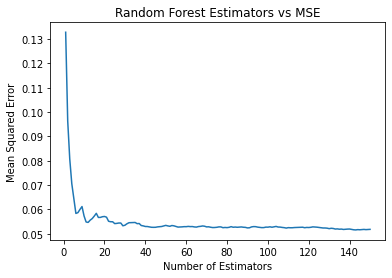

In [108]:
print(mse)
print(estimators)

plt.plot(estimators, mse)
plt.title('Random Forest Estimators vs MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.savefig('estimators.png')
plt.show()

In [105]:
def regression_metrics(y_test, y_pred):
    #Regression metrics
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_test, y_pred)

    #Output regression metrics
    print("Explained Variance: " + str(explained_variance))
    print("Mean Absolute Error: " + str(mean_absolute_error))
    print("Mean Squared Error: " + str(mean_squared_error))
    print("Median Absolute Error: " + str(median_absolute_error))

In [106]:
#Regression metrics for Linear Regression model
print("Multiple Linear Regression Statistics:")
regression_metrics(y_test, y_pred_linear)

print("-----------------------------------------")

#Regression metrics for Random Forest Model
print("Random Forest Model Statistics:")
regression_metrics(y_test, y_pred_forest)

Multiple Linear Regression Statistics:
Explained Variance: 0.9831838449922355
Mean Absolute Error: 0.1289538522183015
Mean Squared Error: 0.028577457633002207
Median Absolute Error: 0.10236038864008179
-----------------------------------------
Random Forest Model Statistics:
Explained Variance: 0.9711544906439233
Mean Absolute Error: 0.1647971360381862
Mean Squared Error: 0.05346918589233626
Median Absolute Error: 0.1133333333333334


In [117]:
X_test

,W,L,ERA,G,GS,CG,ShO,SV,HLD,BS,...,WHIP,BABIP,LOB%,ERA-,FIP-,xFIP-,FIP,E-F,xFIP,SIERA
4,6,0,0.95,65,2,0,0,0,16,4,...,0.94,0.257,86.3,24,59,79,2.45,-1.49,3.37,3.32
8,7,2,1.08,15,15,1,1,0,0,0,...,0.55,0.213,87.2,27,29,37,1.23,-0.16,1.61,1.74
16,4,2,1.23,60,0,0,0,34,0,1,...,0.84,0.237,91.9,29,39,55,1.69,-0.46,2.35,2.09
18,4,5,1.29,71,0,0,0,24,6,5,...,0.96,0.262,76.3,30,50,61,2.11,-0.82,2.60,2.52
21,8,5,1.36,39,12,1,1,4,0,3,...,1.00,0.257,86.3,32,62,79,2.72,-1.36,3.37,3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,3,2,7.56,47,0,0,0,0,3,2,...,1.74,0.354,55.4,176,120,115,5.07,2.49,4.89,4.60
3407,1,7,7.64,14,6,0,0,1,0,0,...,1.54,0.311,55.0,176,132,100,5.70,1.94,4.30,4.53
3416,3,8,8.06,16,11,0,0,0,0,0,...,1.66,0.291,57.3,186,153,127,6.57,1.49,5.44,5.43
3417,2,7,8.07,16,10,0,0,0,0,0,...,1.70,0.324,59.7,183,140,130,6.37,1.70,5.59,5.42


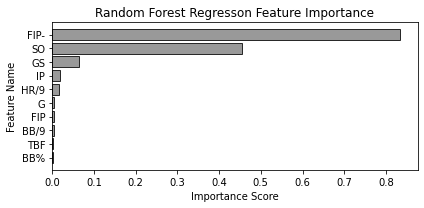

In [114]:
forestImportance = rfpimp.importances(forest_regr, X_test, y_test)
forestImportance_filtered = forestImportance.head(10)

forestGraph, forestAxis = plt.subplots(figsize=(6,3))
forestAxis.barh(forestImportance_filtered.index, forestImportance_filtered['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
forestAxis.set_xlabel('Importance Score')
forestAxis.set_ylabel('Feature Name')
forestAxis.set_title('Random Forest Regresson Feature Importance')
plt.gca().invert_yaxis()
forestGraph.tight_layout()

plt.savefig("random-forest-feature-importance.png")

         Importance
Feature            
FIP-       1.846856
K/9        1.788564
SO         1.533996
K-BB%      0.862958
HR         0.802903
AVG        0.590767
HR/9       0.481573
IP         0.436658
WHIP       0.296863
BB         0.294963


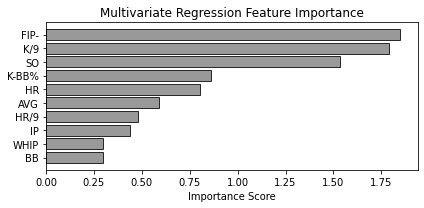

In [115]:
#Project feature importances
regrImportance = rfpimp.importances(regr, X_test, y_test)
regrImportance_filtered = regrImportance.head(10)

#Plot feature importances
graph, axis = plt.subplots(figsize=(6, 3))

axis.barh(regrImportance_filtered.index, regrImportance_filtered['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
axis.set_xlabel('Importance Score')
axis.set_title('Multivariate Regression Feature Importance')
plt.gca().invert_yaxis()

graph.tight_layout()

plt.savefig("multivariate-feature-importance.png")


print(regrImportance_filtered.head(15))

In [62]:
#Determine coefficients

regressionCoefficient = regr.coef_
#forestCoefficient = forest_regr.coef_

for x, y in enumerate(regressionCoefficient):
    print('Feature: %0d, Score: %.5f' % (x,y))

#for x, y in enumerate(forestCoefficient):
#    print('Feature: %0d, Score: %.5f' % (x,y))

Feature: 0, Score: 0.00152
Feature: 1, Score: 0.00413
Feature: 2, Score: -0.34140
Feature: 3, Score: -0.00547
Feature: 4, Score: 0.03843
Feature: 5, Score: 0.06375
Feature: 6, Score: -0.02789
Feature: 7, Score: 0.00919
Feature: 8, Score: 0.00912
Feature: 9, Score: 0.00641
Feature: 10, Score: 0.01746
Feature: 11, Score: -0.00053
Feature: 12, Score: -0.00144
Feature: 13, Score: -0.00541
Feature: 14, Score: 0.00438
Feature: 15, Score: -0.11857
Feature: 16, Score: -0.03504
Feature: 17, Score: -0.00479
Feature: 18, Score: -0.00806
Feature: 19, Score: -0.00318
Feature: 20, Score: 0.01041
Feature: 21, Score: 0.02313
Feature: 22, Score: -0.62823
Feature: 23, Score: 0.31467
Feature: 24, Score: 0.01234
Feature: 25, Score: 1.41836
Feature: 26, Score: -0.02788
Feature: 27, Score: 0.05916
Feature: 28, Score: 0.15840
Feature: 29, Score: -21.34608
Feature: 30, Score: 2.73182
Feature: 31, Score: 8.41798
Feature: 32, Score: -0.00418
Feature: 33, Score: -0.00145
Feature: 34, Score: -0.05657
Feature: 35,